<a href="https://colab.research.google.com/github/sterrenm/Proyecto_Integrado_N-2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

# Define número de filas
num_filas = 100

# Define nombres de columnas
columnas = ['Apellido', 'Nombre', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a Clases']

# Genera datos aleatorios para cada columna
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Fernandez', 'Gomez', 'Lopez', 'Diaz', 'Martinez', 'Garcia', 'Sanchez']  # Agrega más apellidos si lo deseas
nombres = ['Maria', 'Juan', 'Jose', 'Ana', 'Luis', 'Sofia', 'Pedro', 'Laura', 'Lucas', 'Martina']  # Agrega más nombres si lo deseas
dnis = np.random.randint(30000000, 55000000, size=num_filas)  # Rango de DNI argentino
materias = ['Matemática', 'Lengua', 'Historia', 'Geografía', 'Inglés', 'Biología', 'Física', 'Química']  # Agrega más materias si lo deseas
notas_1er_trimestre = np.random.randint(1, 10, size=num_filas)
notas_2do_trimestre = np.random.randint(1, 10, size=num_filas)
notas_3er_trimestre = np.random.randint(1, 10, size=num_filas)
faltas = np.random.randint(0, 30, size=num_filas)

# Crea el DataFrame
datos = {
    'Apellido': np.random.choice(apellidos, size=num_filas),
    'Nombre': np.random.choice(nombres, size=num_filas),
    'DNI': dnis,
    'Materia': np.random.choice(materias, size=num_filas),
    'Nota 1er Trimestre': notas_1er_trimestre,
    'Nota 2do Trimestre': notas_2do_trimestre,
    'Nota 3er Trimestre': notas_3er_trimestre,
    'Faltas a Clases': faltas
}
df = pd.DataFrame(datos, columns=columnas)

# Muestra el DataFrame
df

,Apellido,Nombre,DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Diaz,Luis,32125023,Lengua,4,4,4,23
1,Garcia,Pedro,40542868,Física,7,3,9,14
2,Martinez,Ana,31523703,Lengua,7,8,5,3
3,Lopez,Pedro,44893133,Matemática,3,6,1,13
4,Sanchez,Jose,35407915,Geografía,8,7,8,10
...,...,...,...,...,...,...,...,...
95,Lopez,Maria,44400380,Geografía,2,8,1,26
96,Diaz,Luis,45537241,Química,4,8,7,16
97,Diaz,Sofia,39063733,Historia,8,9,5,1
98,Martinez,Lucas,40269624,Biología,1,3,8,10


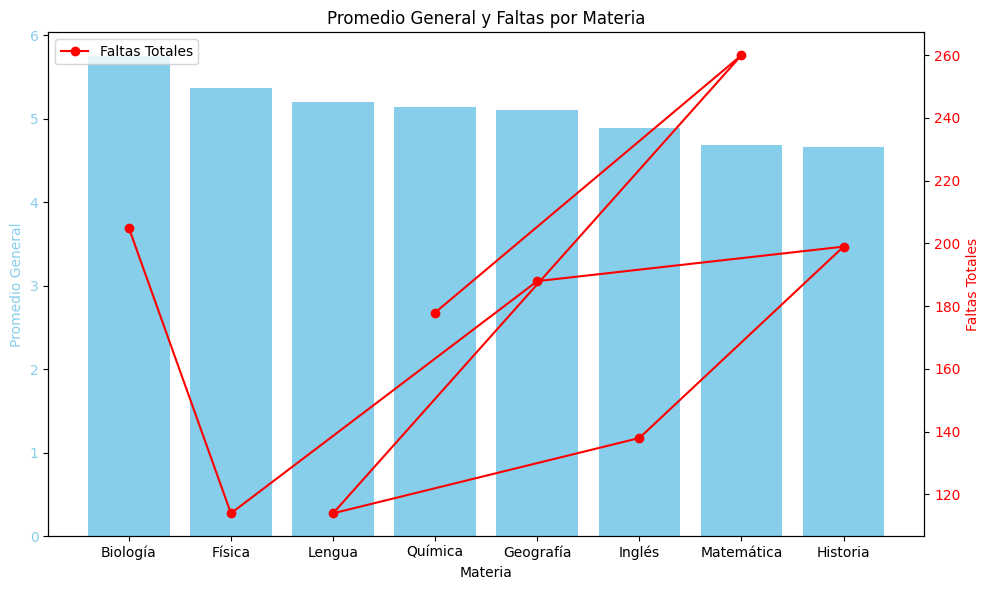

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular el promedio general de cada materia
promedio_materia = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
promedio_materia = promedio_materia.sort_values(ascending=False)

# Obtener las faltas totales por materia
faltas_materia = df.groupby('Materia')['Faltas a Clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras para el promedio general
ax1.bar(promedio_materia.index, promedio_materia.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')

# Segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materia.index, faltas_materia.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params('y', labelcolor='red')

# Ajustar el diseño
plt.title('Promedio General y Faltas por Materia')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

# Mostrar leyenda
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()